## 0.0 IMPORTS


In [1]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.display import Image
from IPython.core.display import HTML

import datetime




# 0.1 Helper Functions


In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [5]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


### 0.2. Loading data

In [6]:
df_sale_raw=pd.read_csv('C:/Users/Roberto Souza/Documents/DatascienceEmProdução/train.csv',low_memory=False)
df_store_raw=pd.read_csv('C:/Users/Roberto Souza/Documents/DatascienceEmProdução/store.csv',low_memory=False)

#merge
df_raw = pd.merge(df_sale_raw, df_store_raw, how='left', on='Store')

In [7]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
333133,535,5,2014-09-19,7545,855,1,1,0,0,a,a,3570.0,4.0,2007.0,0,NaN,NaN,NaN


# 1.0. PASSO 01  DESCRIÇÃO DOS DADOS


In [48]:
df1=df_raw.copy()

## 1.1 Rename Columns

In [49]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x:inflection.underscore(x)

cols_new=list(map(snakecase, cols_old))

#rename
df1.columns=cols_new
      

## 1.2 Data Dimensions

In [50]:
print('Number of rows:{}'.format(df1.shape[0]))
print('Number of cols:{}'.format(df1.shape[1]))

Number of rows:1017209
Number of cols:18


## 1.3 Data Types

In [51]:
df1['date']= pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [52]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [53]:
#competition_distance 
df1['competition_distance']= df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x)


#competition_open_since_month 
df1['competition_open_since_month']= df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'])else x['competition_open_since_month'], axis=1)


#competition_open_since_year 
df1['competition_open_since_year']= df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
                              

#promo2_since_week 
df1['promo2_since_week']= df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis=1)



#promo2_since_year 
df1['promo2_since_year']= df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis=1)



#promo_interval 
month_map={1: 'jan',2: 'Fev',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec',}

df1['promo_interval'].fillna(0,inplace=True)

df1['month_map']= df1['date'].dt.month.map(month_map)

df1['is_promo']= df1[['promo_interval','month_map']].apply( lambda x:0 if x['promo_interval']== 0 else 1 if  x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [55]:
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,31.0,2015.0,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,31.0,2015.0,0,Jul,0


In [56]:
df1['date'][0].year

2015

In [57]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [58]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [59]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [60]:
df1['competition_open_since_month']= df1['competition_open_since_month'].astype(int64)
df1['competition_open_since_year']= df1['competition_open_since_year'].astype(int64)

df1['promo2_since_week']= df1['promo2_since_week'].astype(int64)
df1['promo2_since_year']= df1['promo2_since_year'].astype(int64)


In [61]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical

In [62]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'])

In [63]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
636600,721,7,0,0,0,0,0,3590.0,9,2012,1,22,2012,1
394350,1062,3,7196,622,1,1,0,190.0,9,2012,1,40,2012,0


In [64]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
454116,0,b,b,0,May
713114,0,a,c,"Jan,Apr,Jul,Oct",Sep


### 1.7.1 Numerical Attributes

In [65]:
#Central tendency - mean , median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
             

#Dispersion - Std, Min ,Max, Range, skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T
    
 #concatenate
m= pd.concat([d2, d3 ,d4 ,ct1 , ct2, d1, d5 , d6]).T.reset_index()
m.columns=['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [66]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\Roberto Souza\anaconda3\envs\DataScienceEmproducao\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

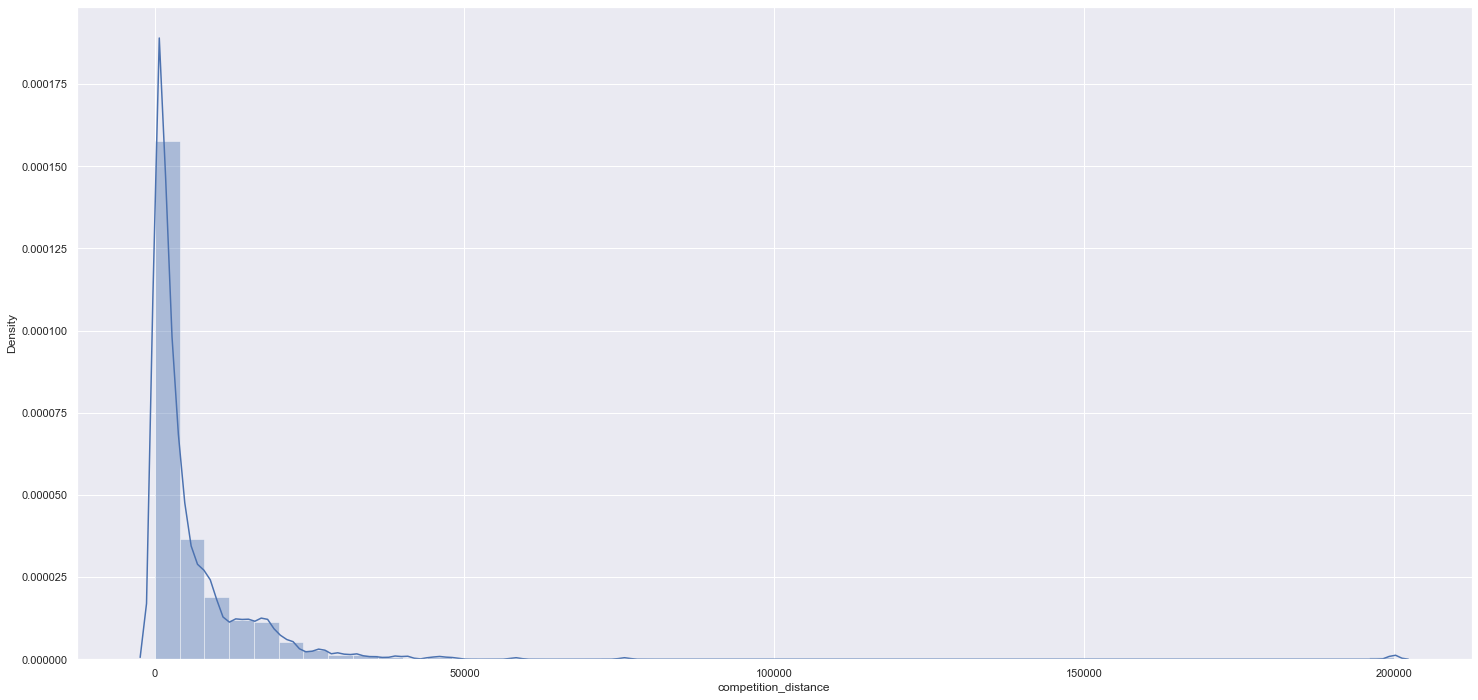

In [31]:
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [67]:
cat_attributes.apply( lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [69]:
 df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

<Figure size 1440x576 with 0 Axes>

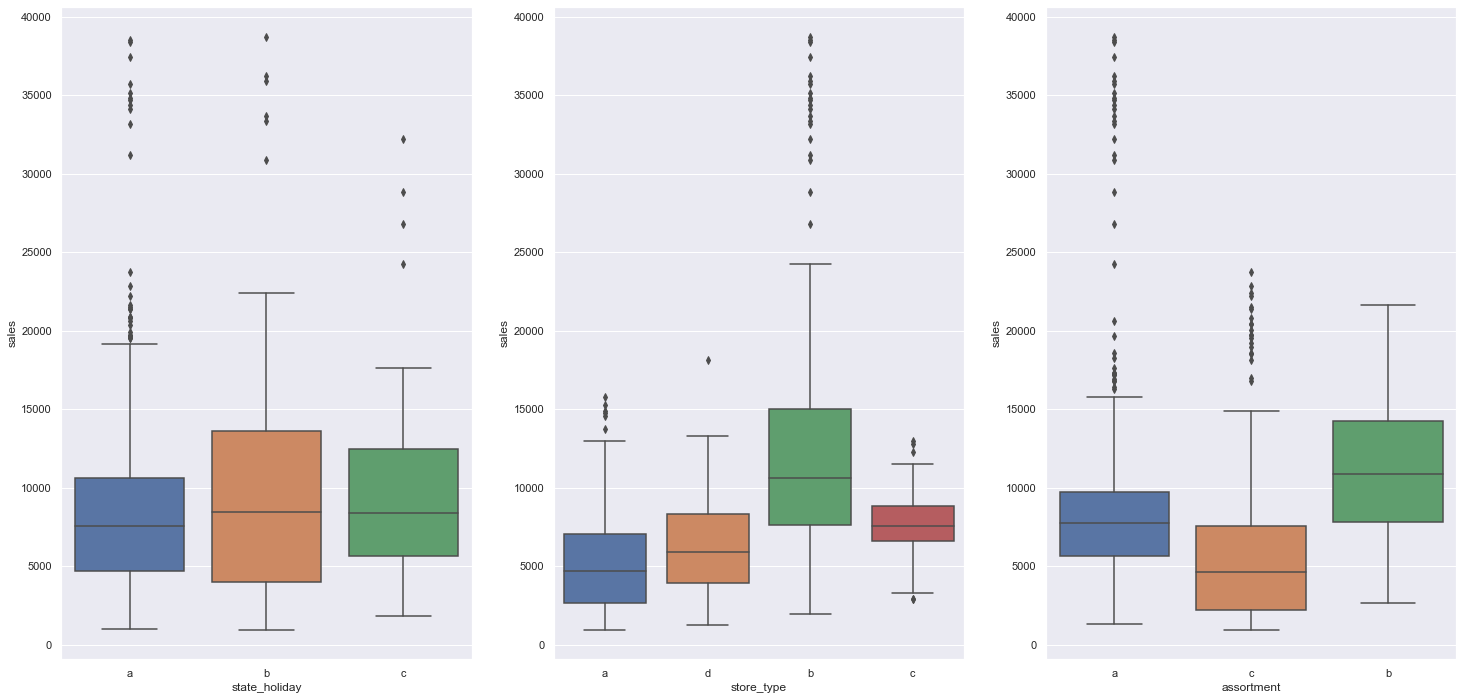

<Figure size 1440x576 with 0 Axes>

In [70]:
aux1 = df1[(df1['state_holiday'] !='0') & (df1['sales']>0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday',y='sales', data=aux1)


plt.subplot(1, 3, 2)
sns.boxplot(x='store_type',y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment',y='sales', data=aux1)
plt.figure(figsize=(20, 8))

# 2.0.Passo 02 - FEATURE ENGINEERING

In [71]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

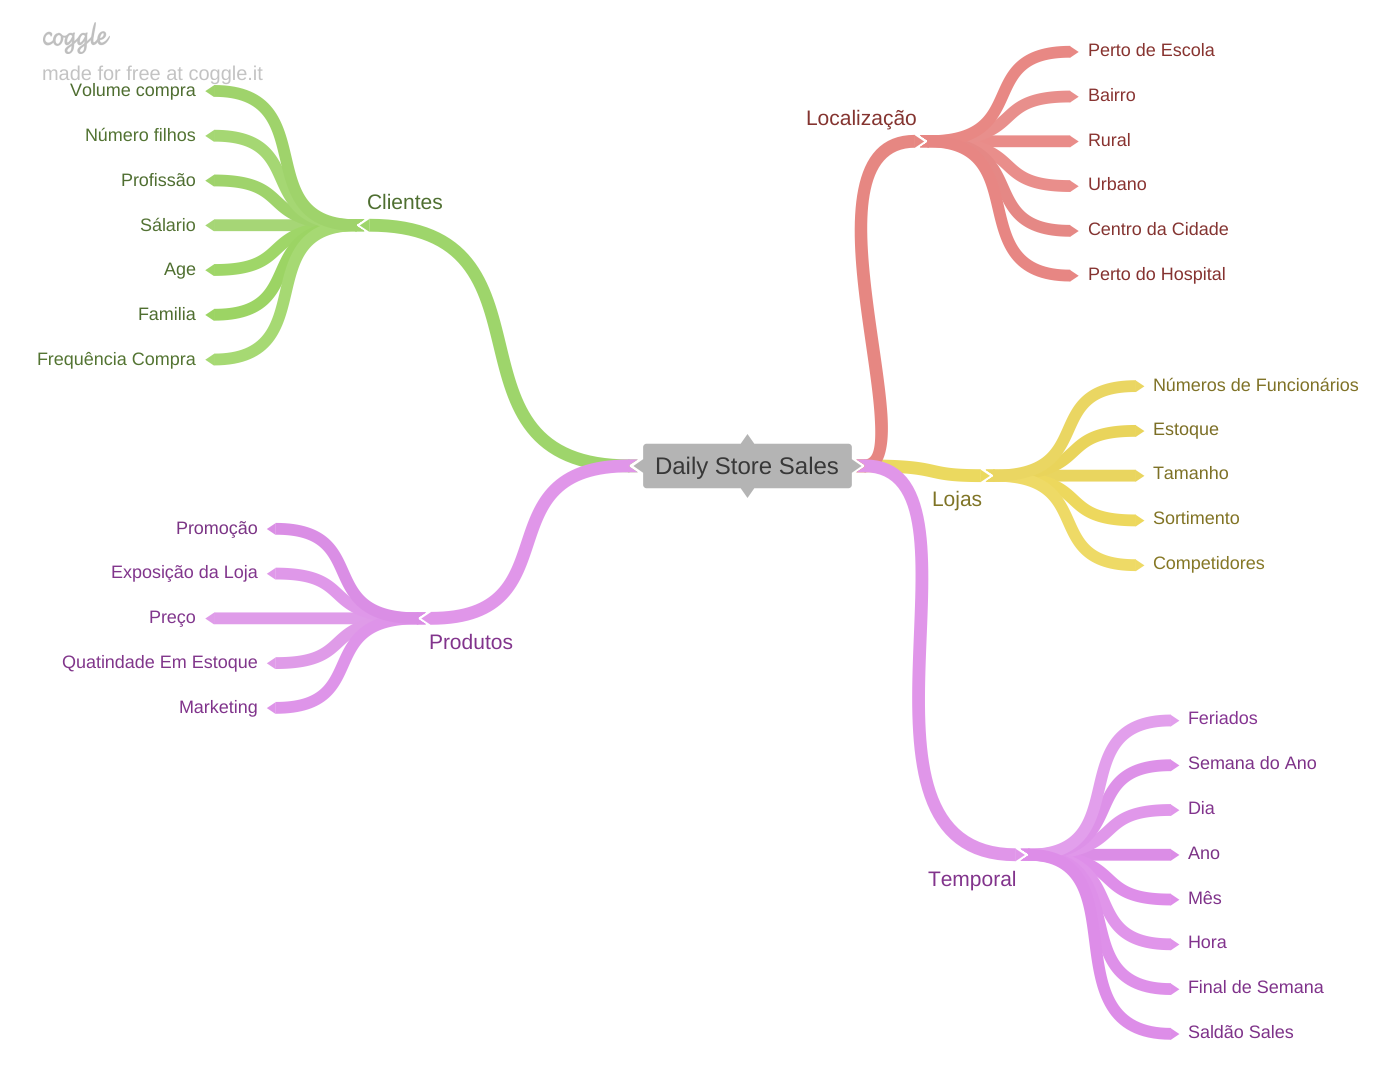

In [12]:
Image('C:/Users/Roberto Souza/Documents/DatascienceEmProdução/MindMapHypothesis.png')

## 2.1. Criação das Hipoteses

### 2.1.1  Hipoteses Loja

**1.** Lojas com maior quadro de funcionarios deveriam vender mais.

**2.** Lojas com maior estoques deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com menor porte deveriam vender menos.

**5.** Lojas com maior sortimento deveriam vender mais.

**6.** Lojas com competidores mais proximos deveriam vender menos.

**7.** Lojas com competidores à mais tempo deveriam vender mais.

### 2.1.2  Hipoteses Produto

**1.** Lojas que investe mais em Marketing deveriam vender mais.

**2.** Lojas que expoem mais o produto na vitrine deveriam vender mais.

**3.** Lojas que tem preços menores nos produtos deveriam vender mais.

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com promoções mais ativa por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoçoes deveriam vender mais.

**7.** Lojas com mais  promoçoes consecutivas deveriam vender mais.






### 2.1.3  Hipoteses Tempo

**1.** Lojas aberta durante o feriado de Natal deveriam vender mais.

**2.** Lojas  deveriam vender mais ao longo dos anos.

**3.** Lojas que abrem nos finais de semana deveriam vender mais.

**4.** Lojas  deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas  deveriam vender menos aos finais de semana.

**6.** Lojas  deveriam vender menos durante o feriados escolares.

### 2.2. Lista Final de Hipotese

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais proximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vender mais.

**4.** Lojas com promoções mais ativa por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoçoes deveriam vender mais.

**6.** Lojas com mais  promoçoes consecutivas deveriam vender mais.

**7.** Lojas aberta durante o feriado de Natal deveriam vender mais.

**8.** Lojas  deveriam vender mais ao longo dos anos.

**9.** Lojas que abrem nos finais de semana deveriam vender mais.

**10.** Lojas  deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas  deveriam vender menos aos finais de semana.

**12.** Lojas  deveriam vender menos durante o feriados escolares.

## 2.3. Feature Enginnering


In [76]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%w')


# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis = 1)
df2['competition_time_month'] = (  (df2['date']- df2['competition_since'] )/30 ). apply( lambda x: x.days).astype( int64 )

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta(days=7) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days).astype(int64)
                                              
                                    
                                              
# assortment
df2['assortment'] = df2['assortment'].apply( lambda x:'basic' if x == 'a' else 'exta'if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x : 'public_holiday' if x == 'a' else 'easter_holiday'if x =='b' else 'christmas'if x== 'c' else 'regular_day')

In [77]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
